# Sentiment Analysis Using Bidirectional LSTM

This notebook demonstrates the creation of a **Bidirectional LSTM (BiLSTM)** model for text classification. The dataset used contains preprocessed tweets categorized into three distinct classes. This approach is particularly relevant for tasks involving sequence data, such as text analysis, due to the bidirectional nature of the LSTM layers, which capture both past and future contexts in the input sequence.

### Why Bidirectional LSTMs for Hate Speech Detection?

Hate speech detection requires identifying subtle and complex patterns in text. These patterns often rely on both:
- **Semantic context:** Understanding the meaning of words or phrases.
- **Syntactic structure:** Grasping relationships between words in a sequence.

BiLSTMs process text in both forward and backward directions, making them well-suited for:
1. **Contextual Understanding:** They capture dependencies from both previous and subsequent words, improving accuracy in tasks like hate speech detection where context matters significantly.
2. **Handling Ambiguities:** Hate speech can include nuanced phrasing, sarcasm, or implicit meanings, which benefit from a richer understanding of the text sequence.

### Potential Limitations of BiLSTMs for Hate Speech Detection

While BiLSTMs are powerful, their effectiveness depends on:
1. **Dataset Quality and Size:** A small or unbalanced dataset may lead to overfitting or biased results.
2. **Complexity of Language:** Hate speech often involves slang, code-switching, or misspellings, which require robust preprocessing.
3. **Real-Time Constraints:** BiLSTMs are computationally intensive, which might make them less suitable for real-time applications without optimization.
4. **Interpretability:** Neural networks like BiLSTMs function as black boxes, making it challenging to understand why a particular prediction was made.

This notebook explores how well a BiLSTM performs on the given dataset and provides insights into its suitability for hate speech detection tasks.


## Importing Required Libraries
We'll begin by importing the necessary libraries for data processing, model building, and evaluation.

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, roc_curve, roc_auc_score, precision_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import csv
from sklearn.metrics import precision_score


In [2]:
from save_data import save_data

In [3]:
from data_split_ready import split_data

In [4]:
X_train, X_test, y_train, y_test,tokenizer = split_data('processed_text.csv')

In [5]:
vocab_size = len(tokenizer.word_index) + 1
max_length = max(len(sequence) for sequence in X_train)
print(max_length)
X_train = pad_sequences(X_train, maxlen=max_length)
X_test=pad_sequences(X_test, maxlen=max_length)

29


## Building the Bidirectional LSTM Model
The model includes embedding layers, multiple bidirectional LSTMs, and dense layers for classification.

In [6]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

C:\Users\Anutosh tiwari\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## Compiling the Model
The model is compiled with the sparse categorical crossentropy loss function, Adam optimizer, and accuracy metric.

In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Adding Early Stopping Callback
Early stopping will prevent overfitting by stopping training when the validation accuracy stops improving for three consecutive epochs.

In [8]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

## Model Summary
Let's inspect the architecture of the model.

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Training the Model without class weights
We train the model using a batch size of 64 and validate it on the testing set.

In [12]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, callbacks=[early_stopping])

Epoch 1/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 92s 297ms/step - accuracy: 0.9050 - loss: 0.2954 - val_accuracy: 0.8816 - val_loss: 0.3373
Epoch 2/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 89s 288ms/step - accuracy: 0.9206 - loss: 0.2561 - val_accuracy: 0.8822 - val_loss: 0.3865
Epoch 3/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 88s 284ms/step - accuracy: 0.9241 - loss: 0.2313 - val_accuracy: 0.8673 - val_loss: 0.4208
Epoch 4/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 88s 284ms/step - accuracy: 0.9439 - loss: 0.1682 - val_accuracy: 0.8747 - val_loss: 0.4233
Epoch 5/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 87s 281ms/step - accuracy: 0.9630 - loss: 0.1204 - val_accuracy: 0.8715 - val_loss: 0.4813


In [13]:
save_data(model,X_test,y_test,'Bidirectional LSTM without class weights')

155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step
Metrics saved to model_metrics.csv


C:\Users\Anutosh tiwari\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model with dynamic class weights

In [15]:
# Initial class weights
class_weights = {0: 5, 1: 1, 2: 2}
epochs = 10
patience = 2  # Number of epochs to wait before stopping if no improvement
min_delta = 0.001  # Minimum improvement in recall to reset patience
best_recall = 0
patience_counter = 0

# Number of classes
num_classes = 3

# Training loop
for epoch in range(epochs):
    # Train the model for one epoch
    model.fit(X_train, y_train, epochs=1, batch_size=64, class_weight=class_weights)
    
    # Evaluate model performance on validation set
    y_pred_probs = model.predict(X_test)  # Predicted probabilities
    y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Predicted class labels
    
    # Calculate recall for each class
    recall = recall_score(y_test, y_pred_classes, average=None, zero_division=0)
    mean_recall = np.mean(recall)  # Average recall across all classes
    
    # Print recall scores for the current epoch
    print(f'Epoch {epoch + 1} Recall: {recall}, Mean Recall: {mean_recall}')
    
    # Check for improvement in mean recall
    if mean_recall > best_recall + min_delta:
        best_recall = mean_recall
        patience_counter = 0  # Reset patience counter if recall improves
    else:
        patience_counter += 1  # Increment patience counter if no improvement
    
    # Stop training if patience runs out
    if patience_counter >= patience:
        print("Early stopping triggered. No significant improvement in recall.")
        break
    
    # Adjust class weights based on recall
    for i in range(num_classes):
        if recall[i] < 0.5:  # If recall is low for a class
            class_weights[i] *= 1.2  # Increase weight for that class
        elif recall[i] < 0.7:  # If recall is moderate
            class_weights[i] *= 1.1  # Slightly increase weight
        else:  # If recall is high
            class_weights[i] *= 0.9  # Reduce weight slightly to focus on other classes
    
    # Normalize class weights to prevent exploding values
    total_weight = sum(class_weights.values())
    class_weights = {k: v / total_weight for k, v in class_weights.items()}
    
    print(f'Updated Class Weights: {class_weights}')


310/310 ━━━━━━━━━━━━━━━━━━━━ 85s 273ms/step - accuracy: 0.9035 - loss: 0.6119
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step
Epoch 1 Recall: [0.42758621 0.91283925 0.73293413], Mean Recall: 0.6911198623557722
Updated Class Weights: {0: 0.689655172413793, 1: 0.10344827586206895, 2: 0.2068965517241379}
310/310 ━━━━━━━━━━━━━━━━━━━━ 82s 266ms/step - accuracy: 0.9307 - loss: 0.0449
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step
Epoch 2 Recall: [0.52068966 0.8723904  0.75209581], Mean Recall: 0.715058620071785
Updated Class Weights: {0: 0.7308970099667774, 1: 0.08970099667774085, 2: 0.1794019933554817}
310/310 ━━━━━━━━━━━━━━━━━━━━ 81s 263ms/step - accuracy: 0.9324 - loss: 0.0329
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step
Epoch 3 Recall: [0.47586207 0.88804802 0.7748503 ], Mean Recall: 0.7129201283560587
Updated Class Weights: {0: 0.7836153161175424, 1: 0.07212822796081925, 2: 0.1442564559216385}
310/310 ━━━━━━━━━━━━━━━━━━━━ 83s 268ms/step - accuracy: 0.9443 - loss: 0.0226
155/155 ━━━━━━━━━━━━━━━━━━━

In [16]:
save_data(model,X_test,y_test,'Bidirectional LSTM with class weights')

155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step
Metrics saved to model_metrics.csv


## Evaluating the Model
Finally, we'll evaluate the model on the test data to calculate its accuracy and loss.

In [17]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step


In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))



Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.43      0.35       290
           1       0.93      0.90      0.91      3832
           2       0.78      0.77      0.77       835

    accuracy                           0.85      4957
   macro avg       0.67      0.70      0.68      4957
weighted avg       0.87      0.85      0.86      4957



In [44]:
save_data(model,X_test,y_test,'Bidirectional LSTM')

155/155 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step
Metrics saved to model_metrics.csv


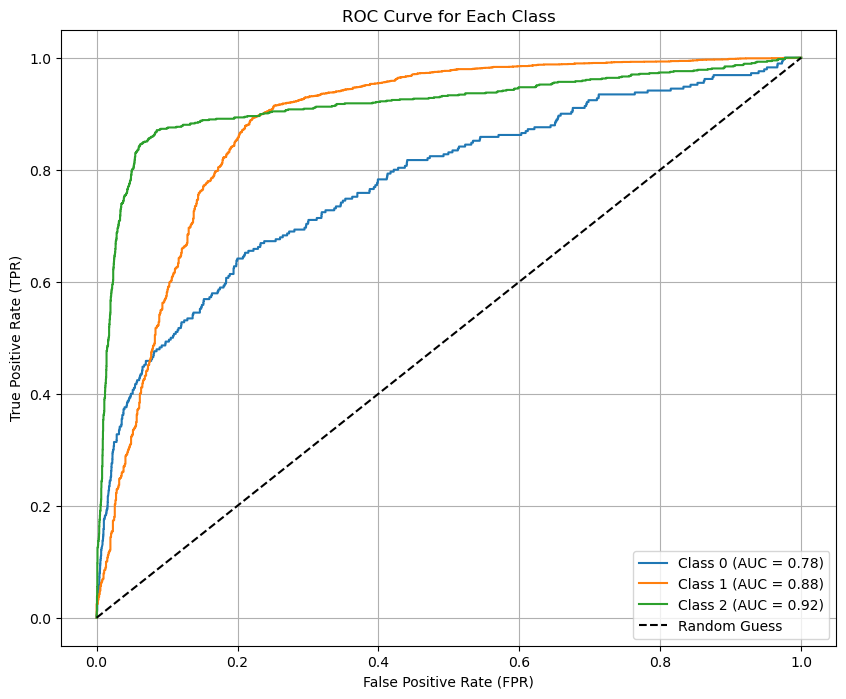

In [21]:

# Assuming `y_test` contains true labels and `y_pred_probs` contains predicted probabilities

# One-hot encode y_test for multi-class ROC
num_classes = len(set(y_test))  # Number of classes
y_test_binarized = label_binarize(y_test, classes=range(num_classes))

# Compute AUC for each class
auc_per_class = roc_auc_score(y_test_binarized, y_pred_probs, average=None)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_per_class[i]:.2f})')

# Add diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Plot settings
plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()
